# Intialize

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz
import os
import time





cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'N_ur': 2.0328,
'm_ncdm': 0.06,
}



# Compute non-linear matter power spectrum

## Method 1

In this method, $P(k,z)$ is obtained by interpolating a $z$ and $k$ grid. 

The number of points in the $k$ dimension is fixed by the emulators settings. 

The number of points in the $z$ dimension is fixed by the use via the parameter `ndim_redshifts`

To request the non-linear matter power spectrum we set `non_linear` in our parameter dictionnary. It can be set to 1,"yes" or to anything. 

In [23]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':'mPk',
'ndim_redshifts': 25,
'non_linear': 'yes',
})
classy_sz.compute_class_szfast()

CPU times: user 113 ms, sys: 87.3 ms, total: 200 ms
Wall time: 143 ms


In [24]:
z = 0.3
kmin = 1e-3
kmax = 1e1
nks = 500
ks = np.geomspace(kmin,kmax,nks)
pks = classy_sz.pk(ks,z)

[]

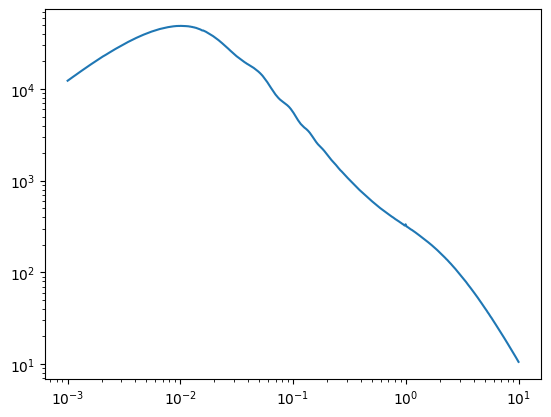

In [25]:
plt.plot(ks,pks)
plt.loglog()

In [6]:
# let's time it
%timeit -n 10 classy_sz.compute_class_szfast()

120 ms ± 2.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Note that this calculation takes longer, because by default we have also computed the linear $P(k)$. 

See hereafter for a faster alternative.

## Method 2

In this method, we first initialize the computation and then compute the pks.

The advantage of this method is that we don't go through the $P(k,z)$ interpolator at each evaluation when we call 
`classy_sz.get_pkl_at_z`

In [7]:
%%time
# initialize computation
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':'mPk',
'non_linear': 'yes',
})
classy_sz.compute_class_szfast()

CPU times: user 373 ms, sys: 255 ms, total: 627 ms
Wall time: 411 ms


In [15]:
%%time
z = 0.3
pks,ks = classy_sz.get_pknl_at_z(z,params_values_dict = cosmo_params)

CPU times: user 4.95 ms, sys: 7.32 ms, total: 12.3 ms
Wall time: 14.6 ms


[]

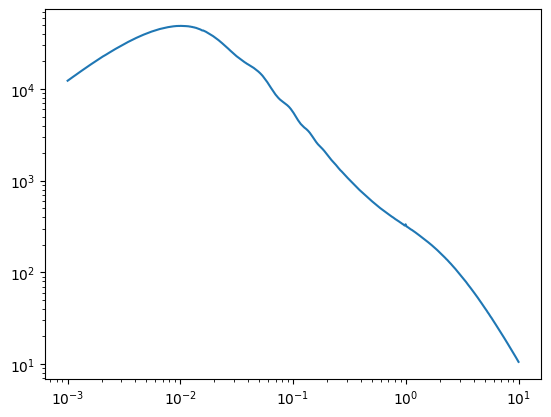

In [29]:
plt.plot(ks,pks)
plt.loglog()

In [10]:
# let's time it 
%timeit -n 10 classy_sz.get_pknl_at_z(z,params_values_dict = cosmo_params)

2.03 ms ± 544 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
